## I- Prétraitement des données

# Importation des Modules nécessaires, et chargement des données

In [1]:

# Importation des modules nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

df = pd.read_csv('Kaggle 1.csv')

df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


# Exploration des données

In [2]:

# Verification des types de données
df.dtypes


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [3]:
# Exploration des données
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


# Supression des colonnes non importante

In [4]:

# Aprés léxploration des données nous avons constaté que les colonnes 'PatientId' et 'AppointmentID' ne sont pas utiles pour notre analyse.
# Nous allons donc les supprimer.
df = df.drop(columns=['PatientId', 'AppointmentID'])
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


# Traitement des valeurs manquantes

In [5]:

df.isnull().sum()

# Le jeu de données ne contient pas de valeurs manquantes

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

# Visualisation des données

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Scholarship'}>,
        <Axes: title={'center': 'Hipertension'}>],
       [<Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'Alcoholism'}>,
        <Axes: title={'center': 'Handcap'}>],
       [<Axes: title={'center': 'SMS_received'}>, <Axes: >, <Axes: >]],
      dtype=object)

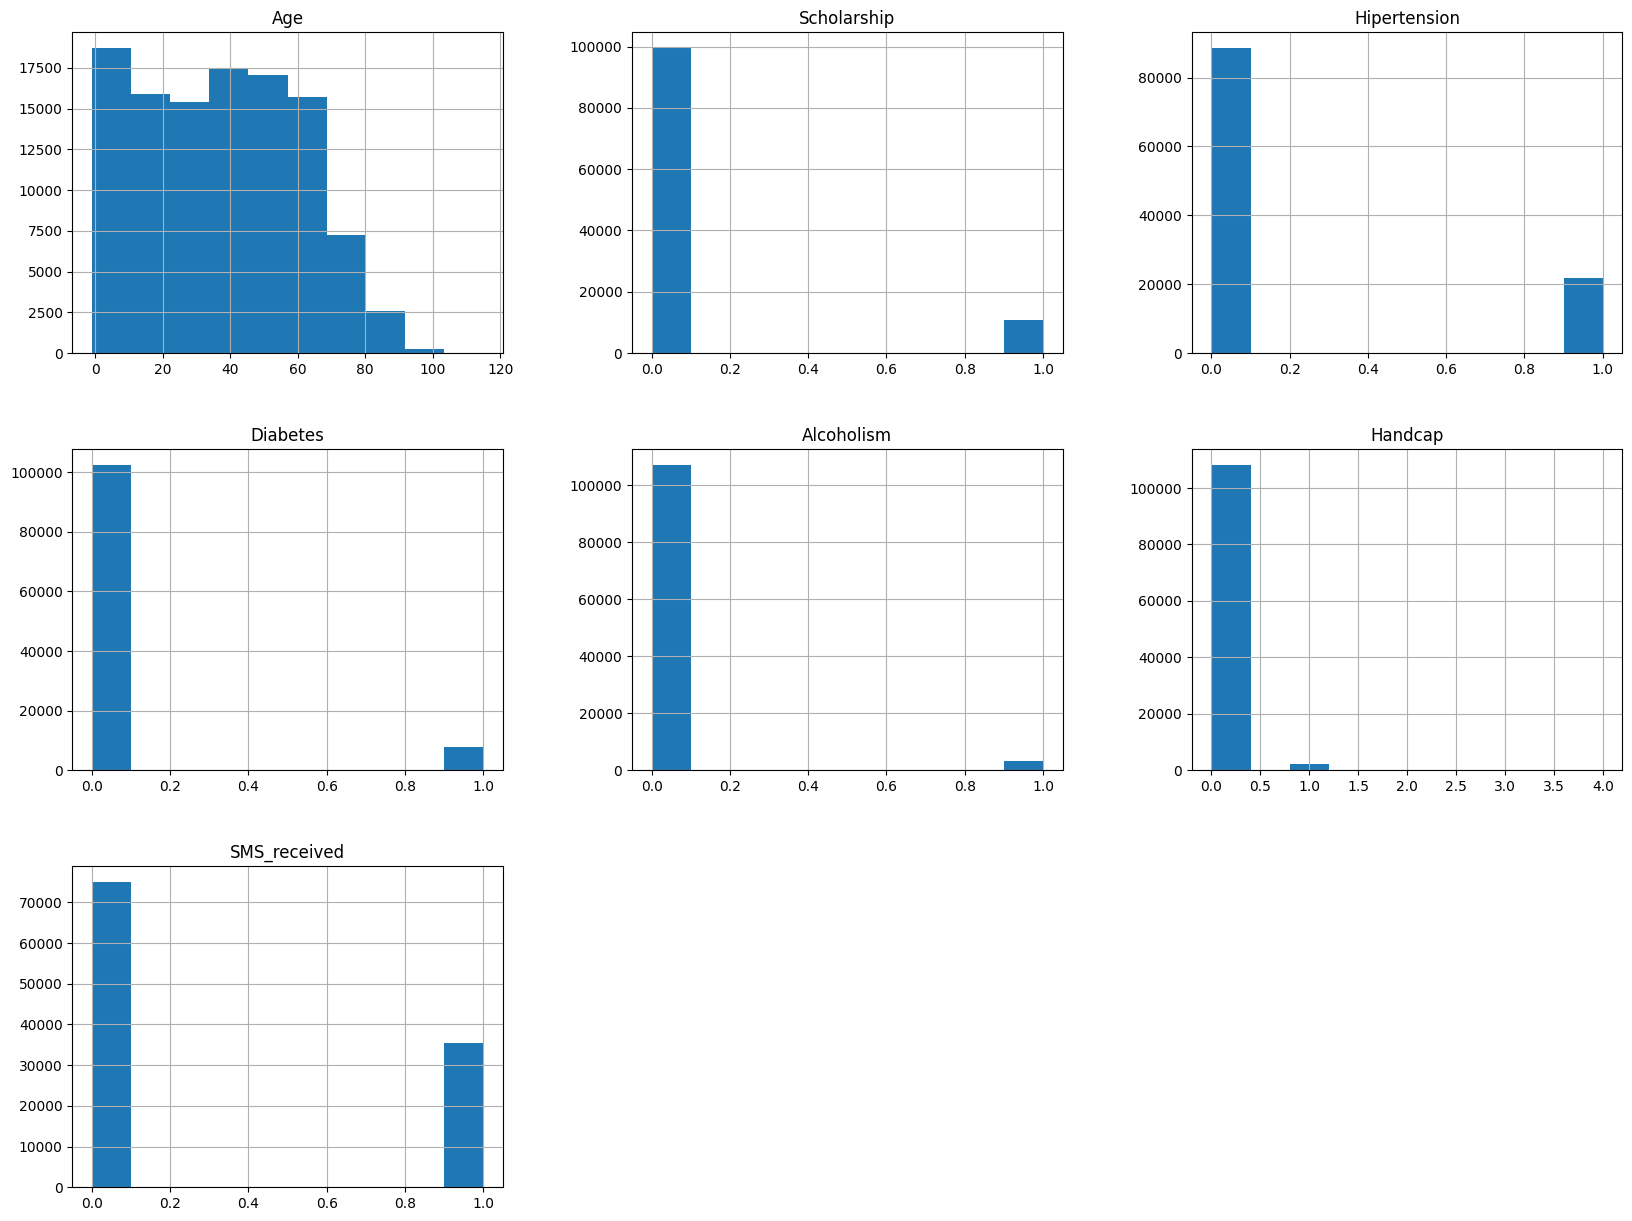

In [6]:
# Histogramme des variables numériques
df.hist(figsize=(20,15))

<Axes: >

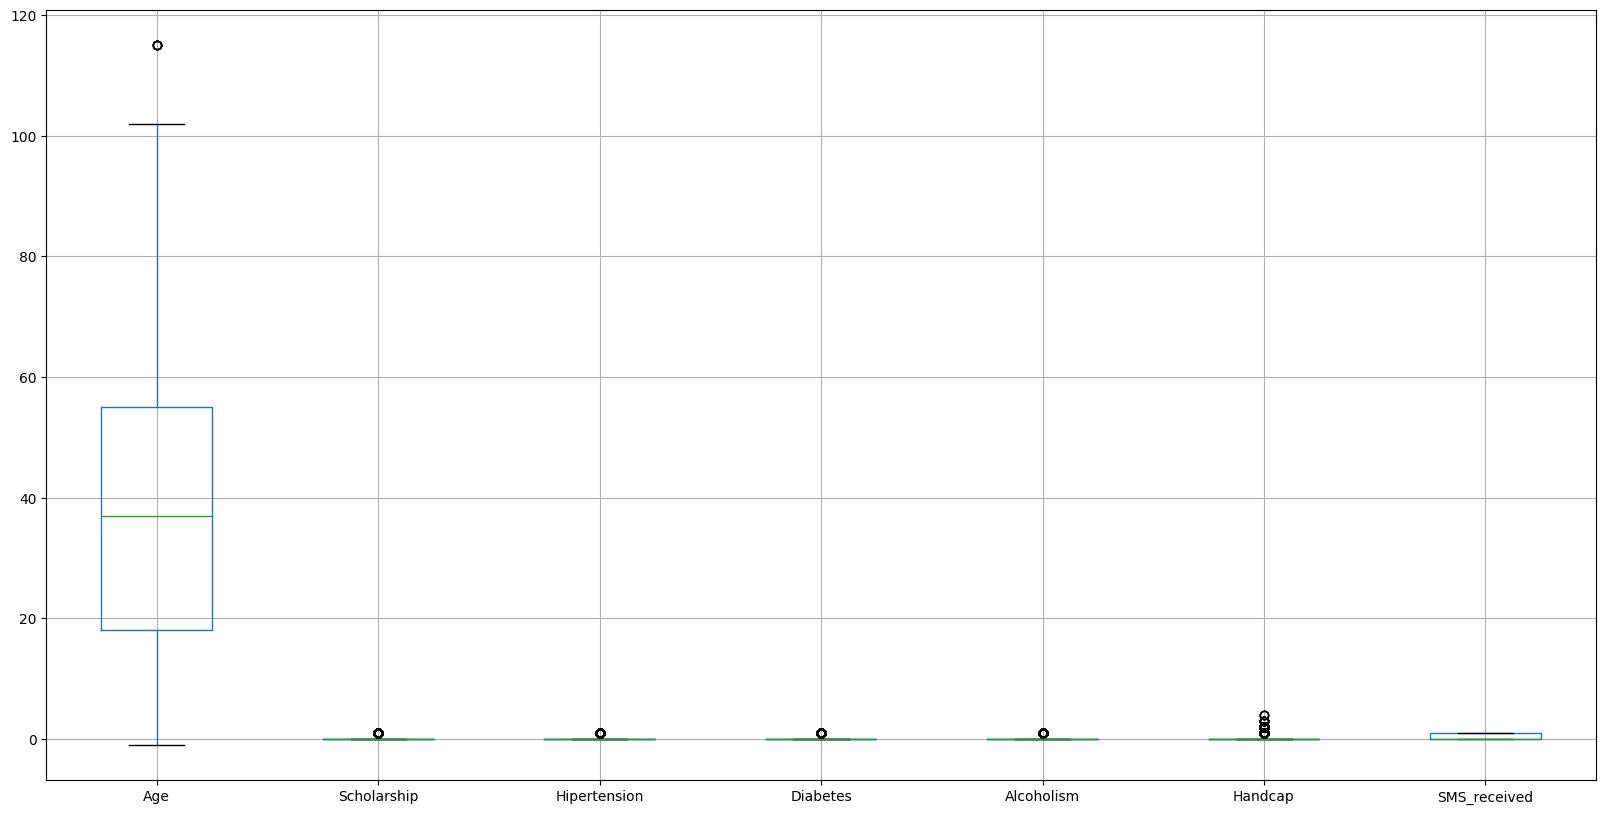

In [7]:
# Boite à moustaches des variables numériques
df.boxplot(figsize=(20,10))

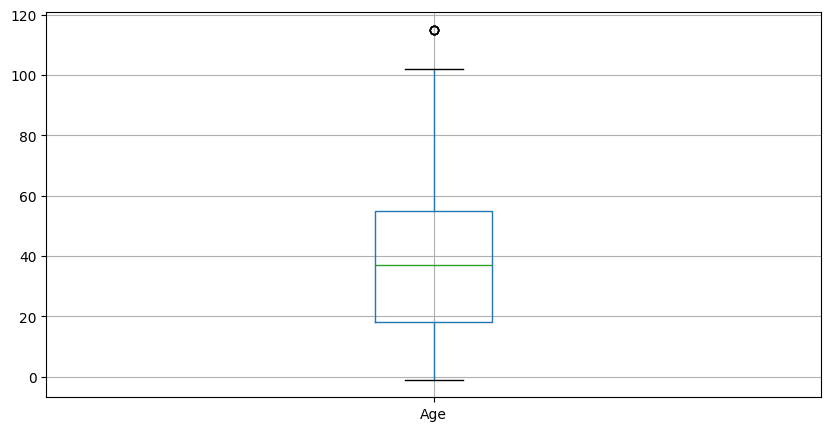

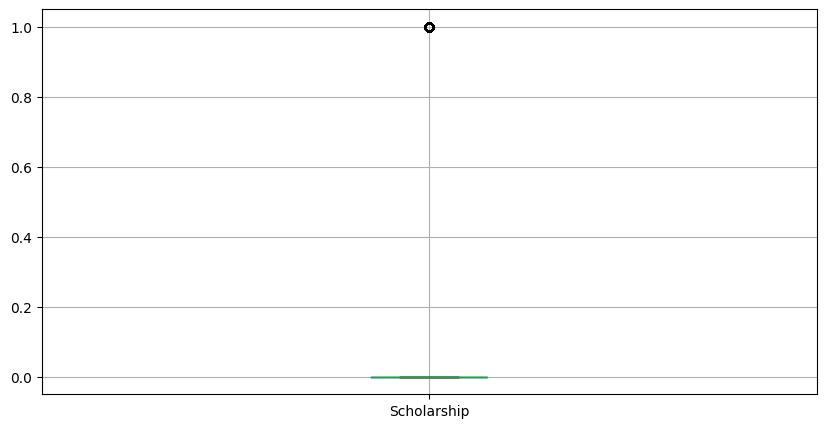

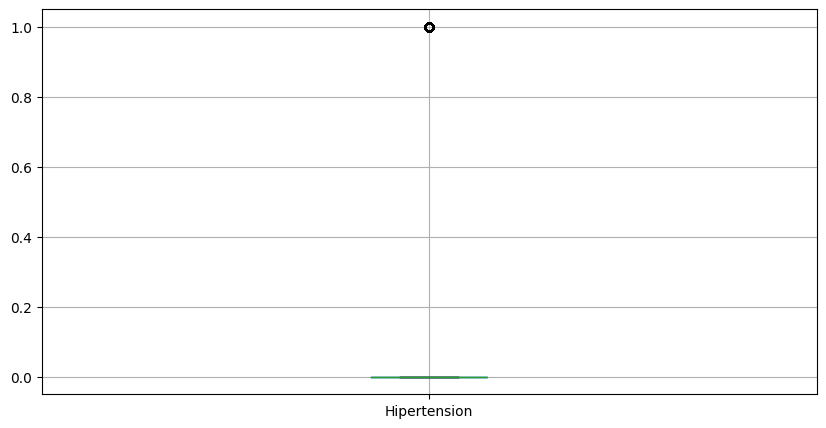

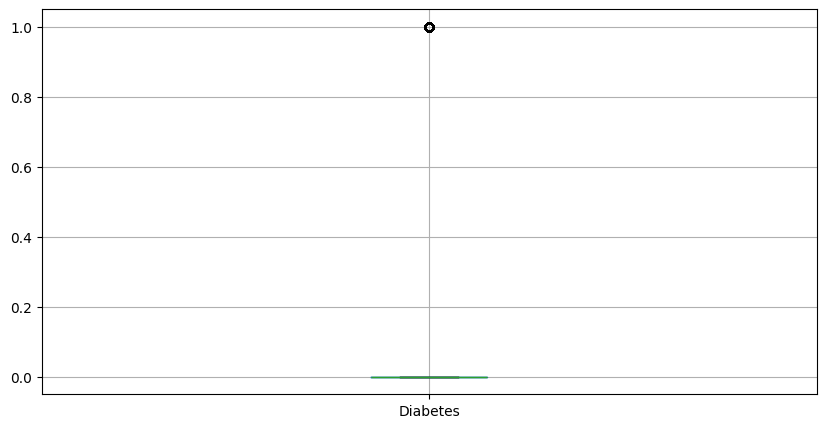

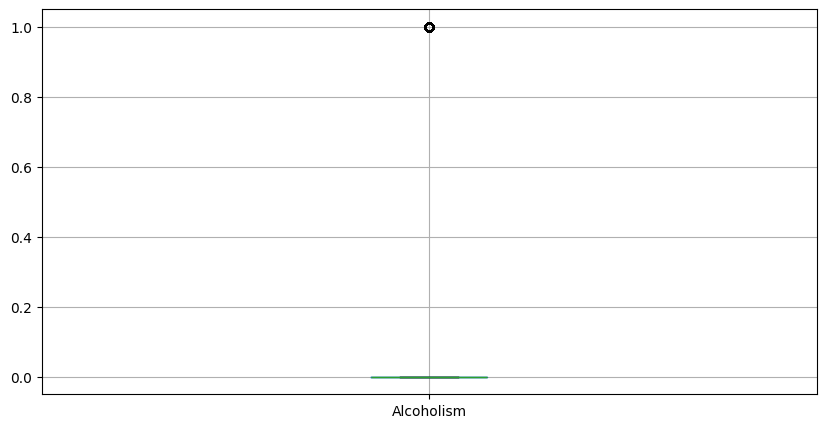

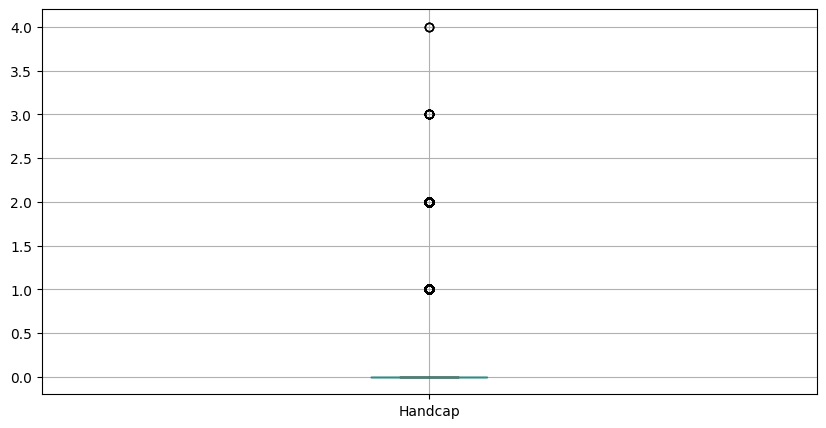

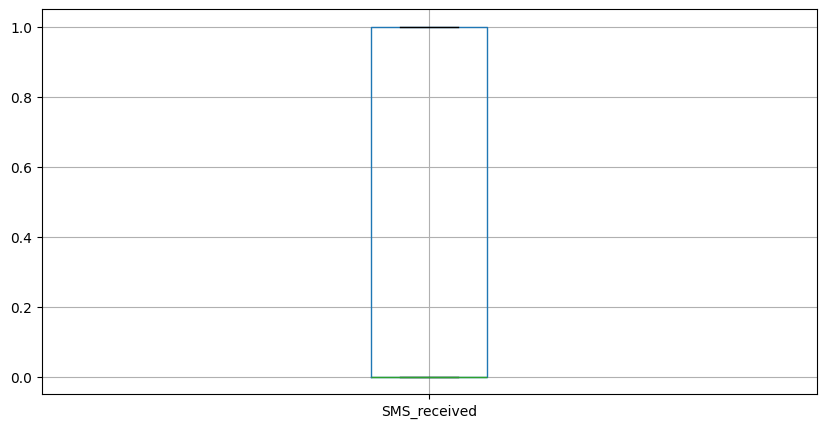

In [8]:
# Visualisation des boites à moustaches un à un
num = df.select_dtypes(include=np.number)

for i in num:
    df.boxplot(column=i, figsize=(10,5))
    plt.show()

In [9]:
# D'après la visualisation, la variable age  et la variable HandCap contient quelques valeur extrème mais non aberantes.

# Traitement des variables categorielles

In [10]:
# Types de données
df.loc[:, df.dtypes == object]

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,JARDIM DA PENHA,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,JARDIM DA PENHA,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,MATA DA PRAIA,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,PONTAL DE CAMBURI,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,JARDIM DA PENHA,No
...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,MARIA ORTIZ,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,MARIA ORTIZ,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,MARIA ORTIZ,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,MARIA ORTIZ,No


In [11]:
# Pour la variable gender nous allons faire le One hot encoding 
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [12]:
# Pour la variable neighborhood, nous allons faire un encodage de Fréquence
df['Neighbourhood'].value_counts()

Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64

In [13]:
# Encodage de fréquence pour la variable 'Neighbourhood'
freq_encoding = df['Neighbourhood'].value_counts(normalize=True)  # Fréquence relative
df['Neighbourhood'] = df['Neighbourhood'].map(freq_encoding)

In [14]:
# Traitement des dates
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']) 
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df

,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Gender_M
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0.035077,0,1,0,0,0,0,No,False
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0.035077,0,0,0,0,0,0,No,True
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0.005827,0,0,0,0,0,0,No,False
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0.000624,0,0,0,0,0,0,No,False
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0.035077,0,1,1,0,0,0,No,False
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,0.052521,0,0,0,0,0,1,No,False
110523,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,0.052521,0,0,0,0,0,1,No,False
110524,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,0.052521,0,0,0,0,0,1,No,False
110525,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,0.052521,0,0,0,0,0,1,No,False


In [15]:
# Après la visualisation et les analyses, nous allons extraire les heures les jours et les mois des deux colonnes de dates
df['ScheduledHour'] = df['ScheduledDay'].dt.hour
df['ScheduledWeekday'] = df['ScheduledDay'].dt.dayofweek
df['ScheduledMonth'] = df['ScheduledDay'].dt.month


df['AppointmentHour'] = df['AppointmentDay'].dt.hour
df['AppointmentWeekday'] = df['AppointmentDay'].dt.dayofweek
df['AppointmentMonth'] = df['AppointmentDay'].dt.month
df = df.drop(columns=['ScheduledDay', 'AppointmentDay'])
df

,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Gender_M,ScheduledHour,ScheduledWeekday,ScheduledMonth,AppointmentHour,AppointmentWeekday,AppointmentMonth
0,62,0.035077,0,1,0,0,0,0,No,False,18,4,4,0,4,4
1,56,0.035077,0,0,0,0,0,0,No,True,16,4,4,0,4,4
2,62,0.005827,0,0,0,0,0,0,No,False,16,4,4,0,4,4
3,8,0.000624,0,0,0,0,0,0,No,False,17,4,4,0,4,4
4,56,0.035077,0,1,1,0,0,0,No,False,16,4,4,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,56,0.052521,0,0,0,0,0,1,No,False,9,1,5,0,1,6
110523,51,0.052521,0,0,0,0,0,1,No,False,7,1,5,0,1,6
110524,21,0.052521,0,0,0,0,0,1,No,False,16,2,4,0,1,6
110525,38,0.052521,0,0,0,0,0,1,No,False,15,2,4,0,1,6


In [16]:
# Séparation de l'étiquette du reste des caractéristiques
X = df.drop(columns=['No-show'])
y = df['No-show'].replace({'No': 0, 'Yes': 1})  # Encodage de l'étiquette

C:\Users\bombo\AppData\Local\Temp\ipykernel_1108\351651753.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df['No-show'].replace({'No': 0, 'Yes': 1})  # Encodage de l'étiquette


In [17]:
# Selection des meilleures caracteristiques par la methode de Kbest
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

selector = SelectKBest(score_func=f_classif, k=8)

selector.fit(X, y)

# On peut voir les caractéristiques sélectionnées
choix = selector.get_feature_names_out()
choix

C:\Users\bombo\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\bombo\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


array(['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'SMS_received',
       'ScheduledHour', 'ScheduledMonth', 'AppointmentMonth'],
      dtype=object)

In [18]:
print(np.shape(X))
print(np.shape(y))

(110527, 15)
(110527,)


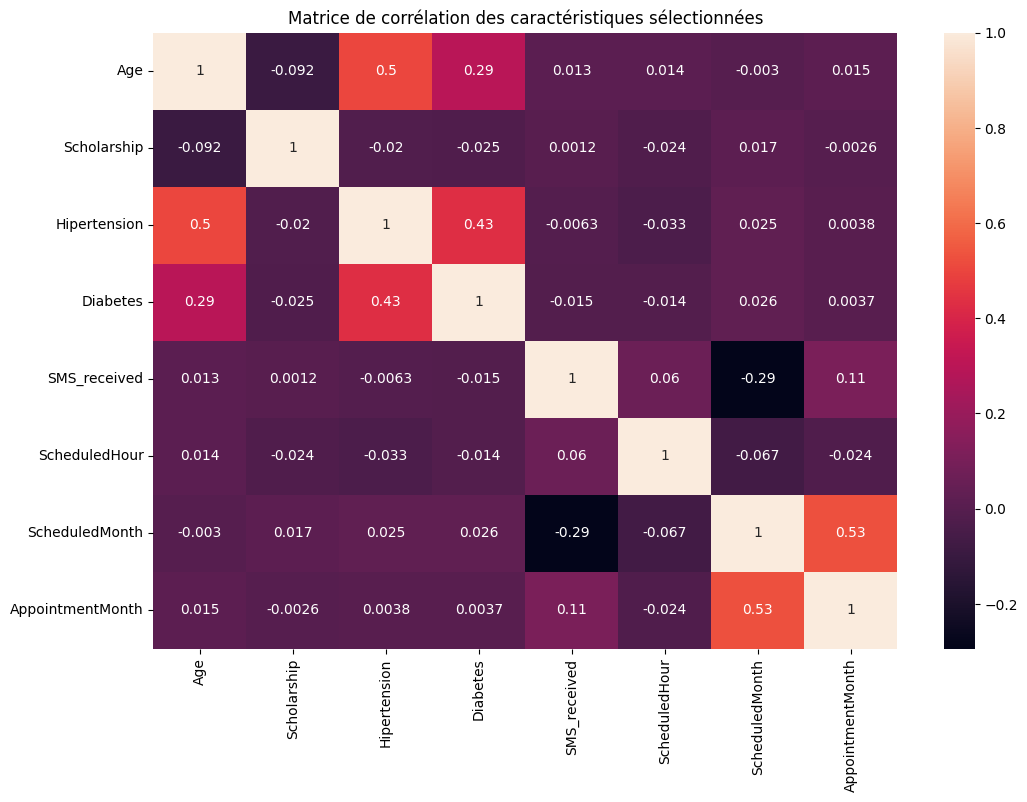

In [19]:
# Visualisation de la matrice de corrélation pour les caractéristiques sélectionnées
import seaborn as sns

# Filtrer les colonnes sélectionnées
X_selected = X[choix]

plt.figure(figsize=(12, 8))
correlation_matrix = X_selected.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Matrice de corrélation des caractéristiques sélectionnées")
plt.show()



In [20]:
# La matrice de corrélation montre les relations entre les caractéristiques sélectionnées.
# Nous observons une très forte corrélation entre la variable suivantes:
# Hipertension et Age, 
# Diabetes et Hipertension,
# ScheduledMonth et AppointmentMonth

## II- Préparation des données pour l'entraînement

In [21]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

print(f"Taille de l'ensemble d'entraînement: {X_train.shape}")
print(f"Taille de l'ensemble de test: {X_test.shape}")
print(f"\nDistribution de la classe cible:")
print(y_train.value_counts(normalize=True))

Taille de l'ensemble d'entraînement: (88421, 8)
Taille de l'ensemble de test: (22106, 8)

Distribution de la classe cible:
No-show
0    0.798068
1    0.201932
Name: proportion, dtype: float64


En observant les value_counts de y_train et y_test, nous avons constaté que la classe "No-show" = 0 reste majoritaire (autour de 80 %), tandis que la classe "No-show" = 1 ne représente qu'environ 20 %.
Ce déséquilibre reflète la réalité : la plupart des patients honorent leur rendez-vous. Toutefois, il peut pousser un modèle à privilégier la classe majoritaire et à ignorer les absences.
Nous conservons donc la répartition naturelle des données, mais nous suivons des métriques adaptées (rappel et F1-score) pour vérifier que les absences sont bien détectées.

In [22]:
# Standardisation des données 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Standardisation terminée")

Standardisation terminée


## III- Entraînement et optimisation des modèles

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Modèle 1 : Régression logistique

In [24]:
log_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression())
])

log_params = {
    "model__penalty": ["l2"],
    "model__C": [1.0],
    "model__solver": ["lbfgs"]
}

log_search = GridSearchCV(log_pipeline, log_params, cv=3, n_jobs=-1)
log_search.fit(X_train, y_train)

log_reg = log_search.best_estimator_

log_pred = log_reg.predict(X_test)

print("Régression logistique")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Precision:", precision_score(y_test, log_pred))
print("Recall:", recall_score(y_test, log_pred))
print("F1:", f1_score(y_test, log_pred))


Régression logistique
Accuracy: 0.7965258300913779
Precision: 0.3508771929824561
Recall: 0.008960573476702509
F1: 0.01747487986020096


## Modèle 2 : SVM linéaire

In [25]:
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVC(kernel='linear', probability=True))
])

svm_params = {
    "model__C": [1.0]
}

svm_search = GridSearchCV(svm_pipeline, svm_params, cv=3, n_jobs=-1)
svm_search.fit(X_train, y_train)

svm_clf = svm_search.best_estimator_

svm_pred = svm_clf.predict(X_test)

print("SVM linéaire")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Precision:", precision_score(y_test, svm_pred))
print("Recall:", recall_score(y_test, svm_pred))
print("F1:", f1_score(y_test, svm_pred))


SVM linéaire
Accuracy: 0.7980638740613408
Precision: 0.0
Recall: 0.0
F1: 0.0


C:\Users\bombo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


## Modèle 3 : Forêt aléatoire

In [26]:
rf_pipeline = Pipeline([
    ("model", RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_params = {
    "model__max_depth": [None]
}

rf_search = GridSearchCV(rf_pipeline, rf_params, cv=3, n_jobs=-1)
rf_search.fit(X_train, y_train)

rf_clf = rf_search.best_estimator_

rf_pred = rf_clf.predict(X_test)

print("Forêt aléatoire")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1:", f1_score(y_test, rf_pred))


Forêt aléatoire
Accuracy: 0.7651316384691939
Precision: 0.3260038240917782
Recall: 0.1527777777777778
F1: 0.2080536912751678


## IV- Comparaison des modèles

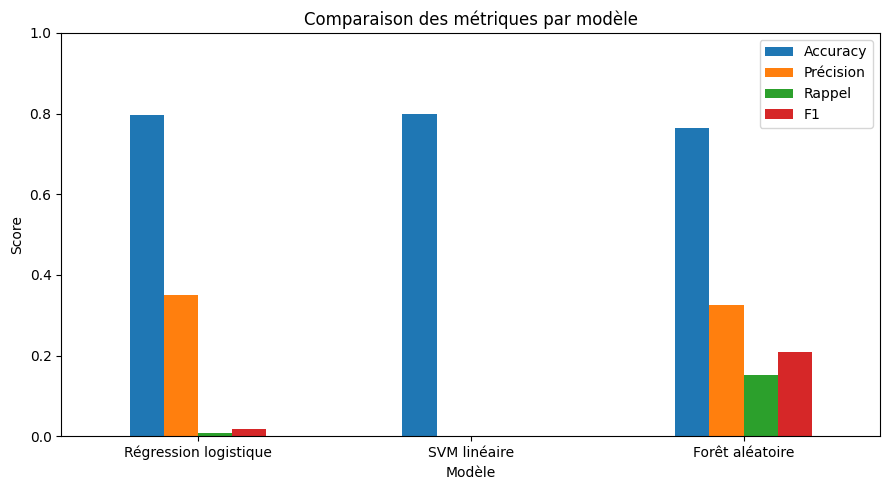

,Accuracy,Précision,Rappel,F1
Modèle,,,,
Régression logistique,0.797,0.351,0.009,0.017
SVM linéaire,0.798,0.000,0.000,0.000
Forêt aléatoire,0.765,0.326,0.153,0.208


In [27]:
# Nous avons utilisé un diagrame en barre regroupé pour comparer les métriques de performance des trois modèles.
metrics_data = []

# Régression logistique
log_pred = log_reg.predict(X_test)
metrics_data.append({
    "Modèle": "Régression logistique",
    "Accuracy": accuracy_score(y_test, log_pred),
    "Précision": precision_score(y_test, log_pred, zero_division=0),
    "Rappel": recall_score(y_test, log_pred, zero_division=0),
    "F1": f1_score(y_test, log_pred, zero_division=0)
})

# SVM linéaire
svm_pred = svm_clf.predict(X_test)
metrics_data.append({
    "Modèle": "SVM linéaire",
    "Accuracy": accuracy_score(y_test, svm_pred),
    "Précision": precision_score(y_test, svm_pred, zero_division=0),
    "Rappel": recall_score(y_test, svm_pred, zero_division=0),
    "F1": f1_score(y_test, svm_pred, zero_division=0)
})

# Forêt aléatoire
rf_pred = rf_clf.predict(X_test)
metrics_data.append({
    "Modèle": "Forêt aléatoire",
    "Accuracy": accuracy_score(y_test, rf_pred),
    "Précision": precision_score(y_test, rf_pred, zero_division=0),
    "Rappel": recall_score(y_test, rf_pred, zero_division=0),
    "F1": f1_score(y_test, rf_pred, zero_division=0)
})

metrics_df = pd.DataFrame(metrics_data).set_index("Modèle")

ax = metrics_df.plot(kind="bar", figsize=(9, 5))
ax.set_ylim(0, 1)
ax.set_ylabel("Score")
ax.set_title("Comparaison des métriques par modèle")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

metrics_df.round(3)

## V- Evaluation des modèles

Nous avons évalué des modèles de classification binaire qui doivent repérer la classe « No-show ». 
Pour juger nos modèles, nous avons privilégié l’accuracy (taux global de bonnes prédictions), la précision (part d’alertes correctes), le rappel (proportion d’absences réellement détectées) et le F1-score (compromis précision/rappel).

Régression logistique : l'accuracy est à 0,797, la précision à 0,351 mais le rappel d’à peine 0,009. Le modèle prédit presque toujours la présence, ce qui limite sa capacité à signaler les absences.

SVM linéaire : aucune absence n’est prédite (précision et rappel nuls), ce classifieur n’est pas exploitable sans ajustement des pondérations de classes ou rééquilibrage des données.

Forêt aléatoire : l'accuracy est un peu plus faible (0,765) mais la précision (0,326) et le rappel (0,153) sont supérieurs, ce qui offre le meilleur compromis pour identifier les absences.

Conclusion : Nous allons conserver la forêt aléatoire comme point de départ, puis tester des techniques de rééquilibrage  pour relever encore le rappel et mieux prévenir les rendez-vous manqués.

## VI- Sauvegarde du meilleur modèle

In [28]:
# Sauvegarde du meilleur modèle selon le F1-score
import joblib

scores = {
    "Régression logistique": f1_score(y_test, log_reg.predict(X_test), zero_division=0),
    "SVM linéaire": f1_score(y_test, svm_clf.predict(X_test), zero_division=0),
    "Forêt aléatoire": f1_score(y_test, rf_clf.predict(X_test), zero_division=0)
}

best_model_name = max(scores, key=scores.get)
best_model = {
    "Régression logistique": log_reg,
    "SVM linéaire": svm_clf,
    "Forêt aléatoire": rf_clf
}[best_model_name]

model_path = "Best_model.joblib"
joblib.dump(best_model, model_path)

print("Meilleur modèle:", best_model_name)
print("F1-score:", round(scores[best_model_name], 3))
print("Fichier enregistré:", model_path)

Meilleur modèle: Forêt aléatoire
F1-score: 0.208
Fichier enregistré: Best_model.joblib
